In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

mammal = tf.Variable("Elephant", tf.string)
ignition = tf.Variable(451, tf.int16)
floating = tf.Variable(3.14159265359, tf.float64)
my_image = tf.zeros([10, 299, 299, 3])
my_image



<tf.Tensor 'zeros:0' shape=(10, 299, 299, 3) dtype=float32>

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
# train_images.shape
# print(train_labels)

train_images = train_images / 255.0
test_images = test_images / 255.0
labelNames = ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)


# predictions = model.predict(test_images)
# predictions
# labelNames[np.argmax(predictions[2])]


Epoch 1/6
60000/60000 [==============================] - 9s 153us/sample - loss: 0.4977 - acc: 0.8250
Epoch 2/6
22368/60000 [==========>...................] - ETA: 5s - loss: 0.3860 - acc: 0.8616

KeyboardInterrupt: 

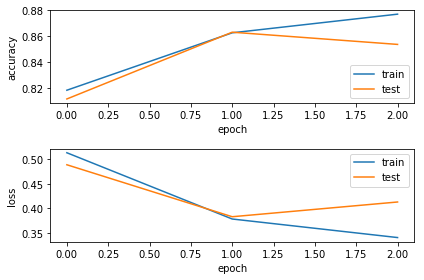

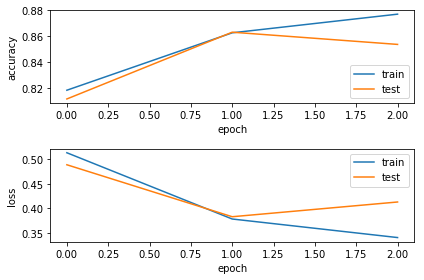

In [35]:
## PROBLEM SECTION: Visualize accuracy across epochs

# from tensorflow import keras
# import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(128, activation=tf.nn.relu),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(10, activation=tf.nn.softmax)
# ])

# model.compile(optimizer=keras.optimizers.Adadelta(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model_log = model.fit(train_images, train_labels, epochs=3
)

# model_log.history

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig


In [29]:
## PROJECT 1

import tensorflow as tf
from tensorflow import keras as ks

(train_images, train_labels), (test_images, test_labels) = ks.datasets.fashion_mnist.load_data()

x_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
x_test = test_images.reshape(test_images.shape[0], 28, 28, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = ks.utils.to_categorical(train_labels, 10)
y_test = ks.utils.to_categorical(test_labels, 10)

input_shape = (28,28,1)

model = ks.Sequential()
model.add(ks.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.25))

model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(128, activation='relu'))
model.add(ks.layers.Dropout(0.5))                     
model.add(ks.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss=ks.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=3,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
score

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
__________

[0.2585048605442047, 0.9034]